# _Even More_ Recursion

AddisCoder 2023 Week 2

Taught by Alex Krentsel (alex.krentsel@gmail.com). 

## More Recursion Practice: Spotting the Base Case and Recursive Case

(whichever bonus problems we didn't get to do together in lec8a)

In [3]:
# Question 1: Skip Add
# Write a function skip_add that takes a single argument n and computes the sum of every other integers between 0 and n starting from n. Assume n is non-negative.
def skip_add(n):
    """ Takes a number x and returns x + x-2 + x-4 + x-6 + ... + 0.

    >>> skip_add(5)  # 5 + 3 + 1 + 0
    9
    >>> skip_add(10) # 10 + 8 + 6 + 4 + 2 + 0
    30
    """
    "*** YOUR CODE HERE ***"

In [4]:
# Question 2: Common Misconception
# Fix the error with the following recursive function.
def count_up(n):
    """Print out all numbers up to and including n in ascending order.

    >>> count_up(5)
    1
    2
    3
    4
    5
    """
    i = 1
    if i == n:
        return
    print(i)
    i += 1
    count_up(n-1)

In [ ]:
# Question 3: Common Misconception
# Fix the error with this recursive function.
def skip_mul(n):
    """Return the product of n * (n - 2) * (n - 4) * ...

    >>> skip_mul(5) # 5 * 3 * 1
    15
    >>> skip_mul(8) # 8 * 6 * 4 * 2  * 0
    0
    """
    if n == 0:
        return 0
    else:
        return n * skip_mul(n - 2)

In [5]:
# Question 4: Common Misconception
# Fix the error with the following recursive function.
def factorial(n):
    """Return n * (n - 1) * (n - 2) * ... * 1.

    >>> factorial(5)
    120
    """
    if n == 0:
        return 1
    else:
        n * factorial(n-1)

In [6]:
# Question 5: Common Misconception
# Fix the error with the following recursive function:
def print_up_to(n):
    """Print every natural number up to n, inclusive.

    >>> print_up_to(5)
    1
    2
    3
    4
    5
    """
    i = 1
    if i > n:
        return
    else:
        print(i)
        i += 1
        print_up_to(n)

In [7]:
# Question 7: Hailstone
# For the hailstone function from homework 1, you pick a positive integer n as the start. If n is even, divide it by 2. If n
# is odd, multiply it by 3 and add 1. Repeat this process until n is 1. Write a recursive version of hailstone that prints out
# the values of the sequence and returns the number of steps.
def hailstone(n):
    """Print out the hailstone sequence starting at n, and return the
    number of elements in the sequence.

    >>> a = hailstone(10)
    10
    5
    16
    8
    4
    2
    1
    >>> a
    7
    """
    "*** YOUR CODE HERE ***"

## Memoization

Let's go back to our Fibonacci implementation from last time

In [1]:
# This is the fibonacci sequence
# f(0) = 1
# f(1) = 1
# f(2) = f(1) + f(0) -> 1 + 1 -> 2
# f(3) = f(2) + f(1) -> 2 + 1 -> 3
# f(4) = f(3) + f(2)
# f(n) = f(n - 1) + f(n - 2)

# How can we write this with code?

def fib(n):
    if n == 0 or n == 1:
        return 1
    return fib(n - 1) + fib(n - 2)

print(fib(1))
print(fib(2))
print(fib(3))
print(fib(4))
print(fib(15))

1
2
3
5
987


In [2]:
# What if we try running fib(50)? It takes a long time to run. Why?
import signal 
def handler_function(signum, frame):
    print("Ran for long enough...this is never going to finish.")
    print("I give up.")
    raise Exception("Stopping...")
signal.signal(signal.SIGALRM,handler_function) 
signal.alarm(5) # 5 seconds

fib(50)

Ran for long enough...this is never going to finish.
I give up.


Exception: Stopping...

The call-tree gets _really_ big really quickly. 

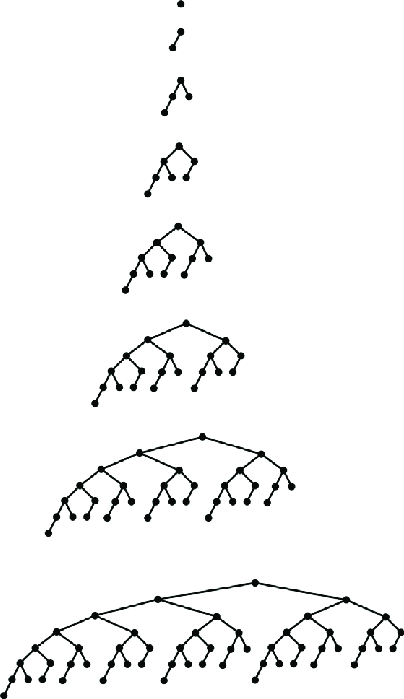

How big? Let's draw it out on the board.

How can we do better? 

Caching, also known as memoization. Keep a side-table and store the intermediate results we calculate. This makes our big bushy tree look more like a line.

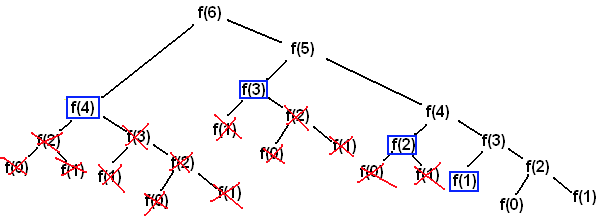

Let's build it.

In [9]:
# Maps come in handy, from lecture 7b.

# Map from fibonacci number to the result
scratchpad = {}

def fib(n):
    if n == 0 or n == 1:
        return 1
    if n in scratchpad:
        return scratchpad[n]
    result = fib(n - 1) + fib(n - 2)
    scratchpad[n] = result
    return result

print(fib(1))
print(fib(10))
print(fib(50))

1
89
20365011074


In [10]:
# Super fast!! Let's build it in a cleaner way now.

# This is called a decorator. It wraps additional functionality around a function.
def memoize(f):
    scratchpad = {}
    def inner(n):
        if n not in scratchpad:
            scratchpad[n] = f(n)
        return scratchpad[n]
    return inner

@memoize
def fib(n):
    if n == 0 or n == 1:
        return 1
    return fib(n - 1) + fib(n - 2)

# Still works!
print(fib(1))
print(fib(10))
print(fib(50))

1
89
20365011074


This is just as fast, but is more organized — now the scratchpad is clearly specific to this one function. This matters if you have a bunch of different functions.